In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

In [4]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [5]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [6]:
newData = co2['co2'].resample('MS').mean()

In [7]:
newData.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [10]:
newData.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [8]:
newData.isnull().sum()

5

In [9]:
newData = newData.fillna(newData.bfill())
#before fill fill the preceeding value in the sequence

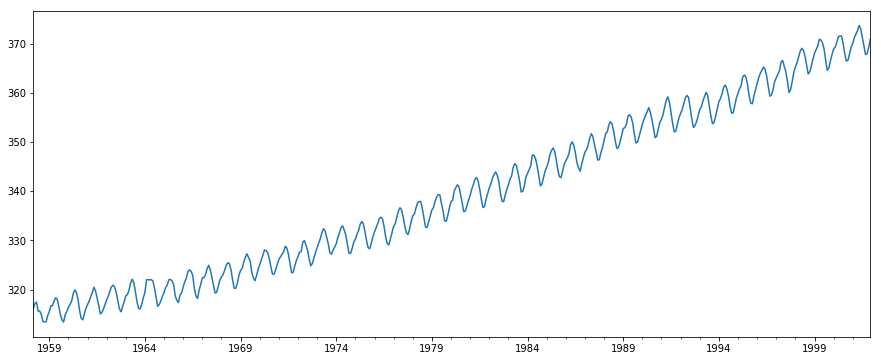

In [16]:
newData.plot(figsize = (15,6))
plt.show()


In [17]:
from pylab import rcParams

In [18]:
rcParams['figure.figsize'] = 11,9

In [20]:
decomposition_add = sm.tsa.seasonal_decompose(newData, model = 'additive')


In [21]:
decomposition_mul = sm.tsa.seasonal_decompose(newData, model = 'multiplicative')

In [22]:
fig1 = decomposition_add.plot()

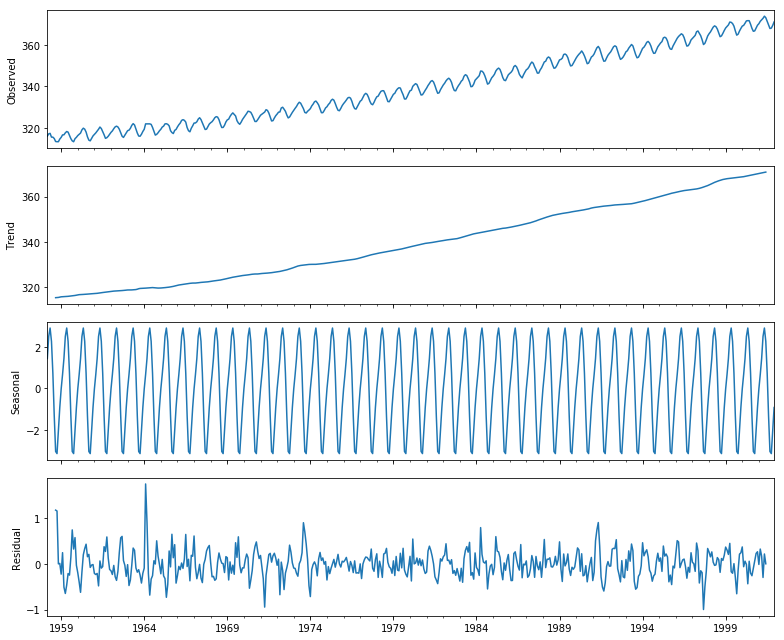

In [23]:
plt.show()

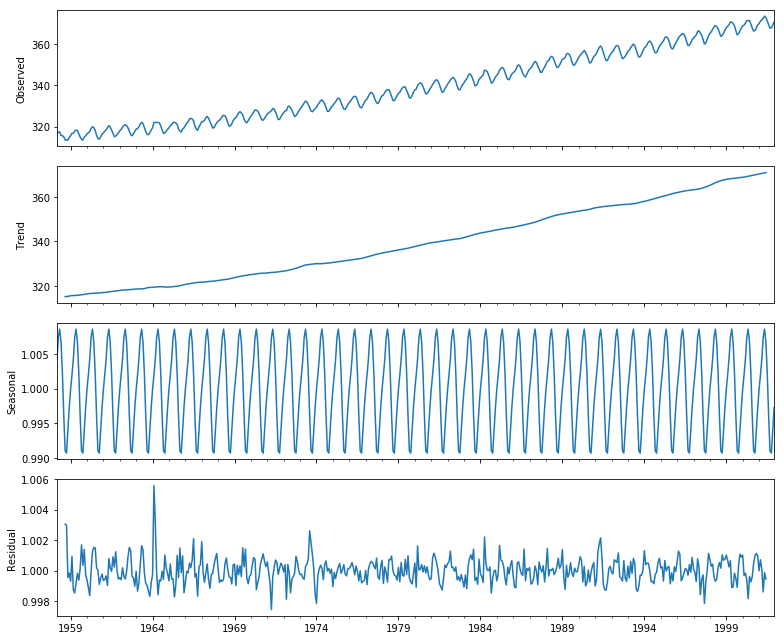

In [24]:
fig2 = decomposition_mul.plot()
plt.show()

In [31]:
import numpy as np
import itertools

In [29]:
#arima model
p=d=q = range(0,2)

In [32]:
pdq = list(itertools.product(p,d,q))

In [33]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [35]:
seasonal_coeff = [(x[0],x[1],x[2],12) for x in pdq]

In [36]:
seasonal_coeff

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [42]:
for param in pdq:
    
    for param_seasonal in seasonal_coeff:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(newData,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

           
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

test
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624034716
test
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727641156
test
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320024
test
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878479427195
test
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
test
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.764791293203
test
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754608479
test
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.66232771461
test
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067397522
test
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716762388


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


test
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1084.2745408844885


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


test
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:835.8648188253603
test
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893624395
test
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.091298811175
test
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194076
test
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
test
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501757813287


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


test
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283759700272
test
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:478.3296907346145
test
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:323.0776424200207
test
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1371.187260233784
test
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1101.841073430292
test
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:587.9479710283794
test
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:302.4949000244896
test
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:584.4333533489446
test
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:337.1999051135075
test
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:433.0863608163978


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


test
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5190182292806
test
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1676.888176736206
test
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1241.935468904619
test
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:624.2602350563734
test
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:341.28966095670376
test
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:579.3896623255876
test
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:370.5920391281557
test
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:476.05004266035826
test
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:327.5808595184851
test
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1372.6085881680997
test
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1199.4888188149973
test
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:586.448573264025
test
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:305.627382225919


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


test
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:584.9418477134712


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


test
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:393.71092975542825
test
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:433.5469464751004
test
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:284.35969118846583
test
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1324.3111127324576


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


test
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1060.9351914433166
test
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:600.7412682860123
test
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:312.13296336787914
test
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:593.6637754899707
test
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:349.2091464664124
test
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:440.137588441048
test
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:293.7426223095214
test
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1262.6545542448198
test
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1052.0636724059384
test
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:581.3099935322713
test
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:295.9374058551507
test
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:576.8647111794048
test
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:327.90491232293255
test
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:444.1243686507571
test
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:277.7802235717791


In [43]:
bestMod = sm.tsa.statespace.SARIMAX(newData, order = (1,1,1), seasonal_order = (1,1,1,12), enforce_stationarity = False, enforce_invertibilty = False)


In [44]:
results = bestMod.fit()

In [45]:
results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.857
Date:                            Mon, 27 Nov 2017   AIC                            277.714
Time:                                    21:47:47   BIC                            299.040
Sample:                                03-01-1958   HQIC                           286.064
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3184      0.092      3.444      0.001       0.137       0.500
ma.L1         -0.6253      0.077     -8.149      0.000      -0.776      -0.475
ar.S.L12      -0.0009      0.001     -1.722      0.085      -0.002       0.000
ma.S.L12      -0.8767      0.026    -33.808      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.614      0.000       0.089       0.106
===================================================================================
Ljung-Box (Q):                       36.28   Jarque-Bera (JB):               189.43
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.40
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.3184,0.092,3.444,0.001,0.137,0.500
ma.L1,-0.6253,0.077,-8.149,0.000,-0.776,-0.475
ar.S.L12,-0.0009,0.001,-1.722,0.085,-0.002,0.000
ma.S.L12,-0.8767,0.026,-33.808,0.000,-0.928,-0.826
sigma2,0.0972,0.004,22.614,0.000,0.089,0.106


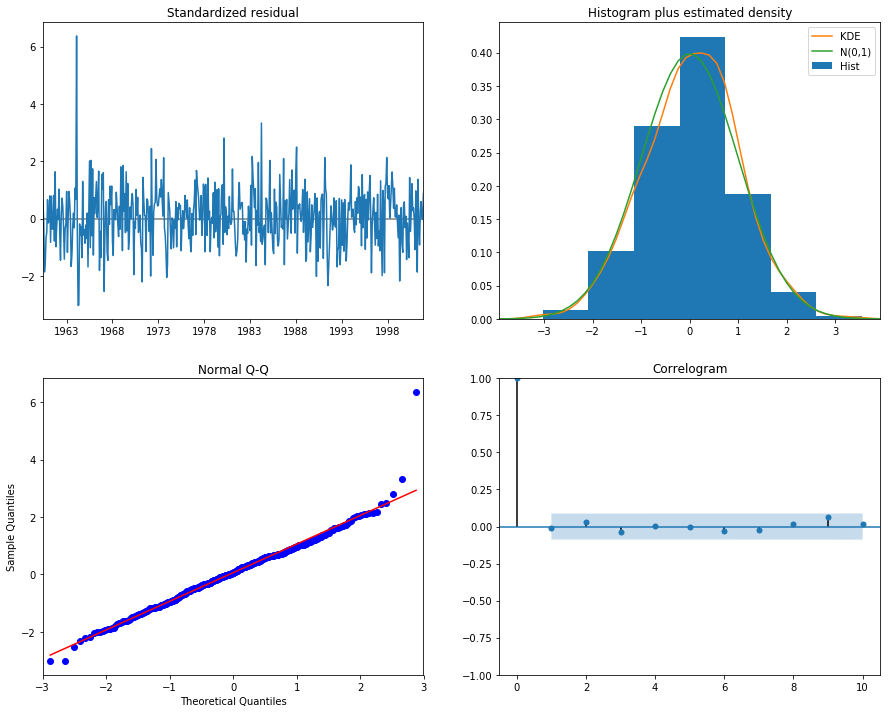

In [49]:
results.plot_diagnostics(figsize = (15,12))
plt.show()

In [51]:
pd.to_datetime("2017-01-01")

Timestamp('2017-01-01 00:00:00')

In [54]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic = False)

In [55]:
pred_ci = pred.conf_int()

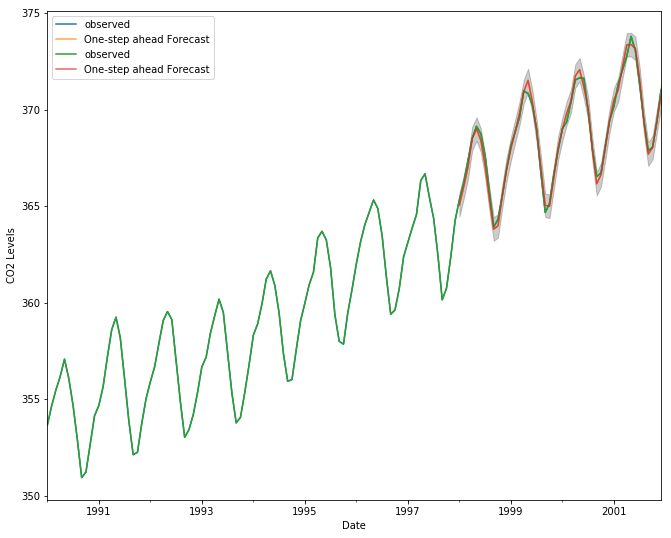

In [61]:
ax = newData['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [63]:
y_original = newData['1998-01-01':]

In [66]:
y_pred = pred.predicted_mean

In [72]:
mse = ((y_original-y_pred)**2).mean()
round(mse,3)

0.073

In [73]:
# for dynamic forcasting set as True for forecasting using values already forecasted before
pred_t = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic = True)
pred_ci_t = pred_t.conf_int()

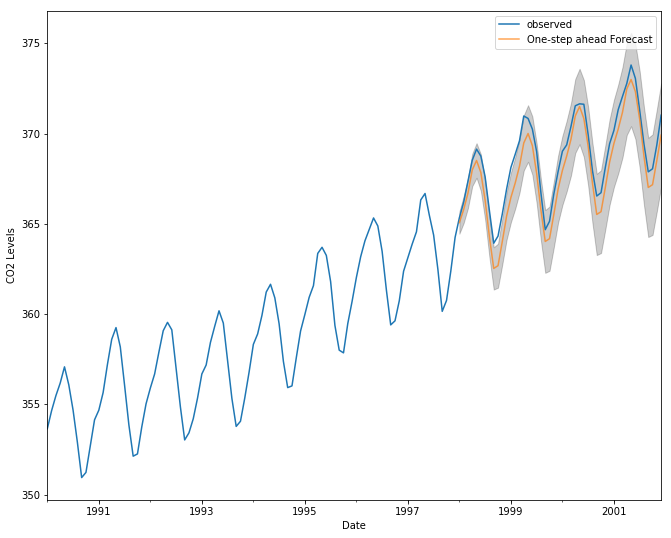

In [74]:
ax = newData['1990':].plot(label='observed')
pred_t.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci_t.index,
                pred_ci_t.iloc[:, 0],
                pred_ci_t.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [75]:
y_pred_t = pred_t.predicted_mean

In [77]:
mse = ((y_original-y_pred_t)**2).mean()
round(mse,3)

1.008

In [80]:
y_pred_forecast = results.get_forecast(steps = 1000)

In [81]:
pred_ci_f = y_pred_forecast.conf_int()

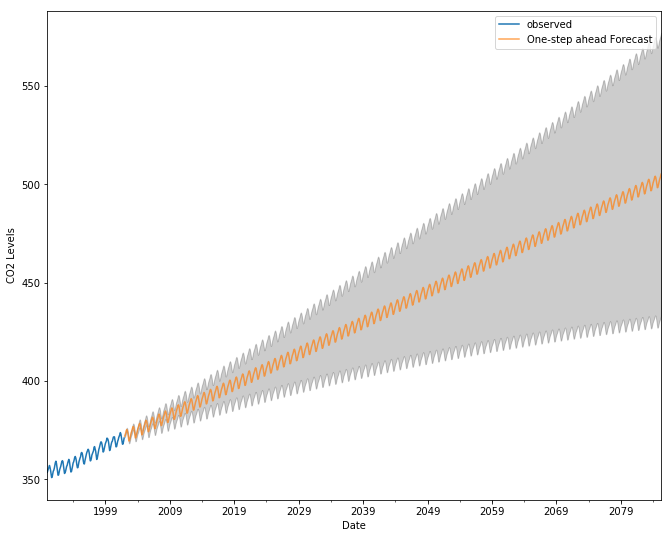

In [82]:
ax = newData['1990':].plot(label='observed')
y_pred_forecast.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci_f.index,
                pred_ci_f.iloc[:, 0],
                pred_ci_f.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()